# Insights House Rocket Company

![House_Rocket_2](../images/house_rocket_img_v4.jpg)

# 1. Problema de negócio

A **House Rocket** (empresa fictícia) é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

A principal estratégia é comprar imóveis em ótimas localizações com preços baixos e revendê-los mais caros. O CEO da House Rokcet gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio

## 1.1 Desafio

Como Cientista de Dados, o meu objetivo é encontrar as melhores oportunidades de negócio respondendo as seguintes perguntas:

**1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?** <br>
**2.  Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?**

# 2. Dataset

Para ajudar a responder essas perguntas, foi utilizado um dataset público disponível no Kaggle.

| Variável | Definição |
| :- | :- |
| id | Identificador de cada imóvel. |
| date | Data em que a imóvel ficou disponível. |
| price | O preço de cada imóvel, considerado como preço de compra. |
| bedrooms | Número de quartos. |
| bathrooms | O número de banheiros, o valor 0,5 indica um quarto com banheiro, mas sem chuveiro. O valor 0,75 ou 3/4 banheiro representa um banheiro que contém uma pia, um vaso sanitário e um chuveiro ou banheira. |
| sqft_living | Pés quadrados do interior das casas. |
| sqft_lot | Pés quadrados do terreno das casas. |
| floors | Número de andares. |
| waterfront | Uma variável fictícia para saber se a casa tinha vista para a orla ou não, '1' se o imóvel tem uma orla, '0' se não. |
| view | Vista, Um índice de 0 a 4 de quão boa era a visualização da imóvel. |
| condition | Um índice de 1 a 5 sobre o estado das moradias, 1 indica imóvel degradado e 5 excelente |
| grade | Uma nota geral é dada à unidade habitacional com base no sistema de classificação de King County. O índice de 1 a 13, onde 1-3 fica aquém da construção e design do edifício, 7 tem um nível médio de construção e design e 11-13 tem um nível de construção e design de alta qualidade. |
| sqft_above | Os pés quadrados do espaço habitacional interior acima do nível do solo. |
| sqft_basement | Os pés quadrados do espaço habitacional interior abaixo do nível do solo. |
| yr_built | Ano de construção da imóvel. |
| yr_renovated | Representa o ano em que o imóvel foi reformado. Considera o número ‘0’ para descrever as imóvel nunca renovadas. |
| zipcode | Um código de cinco dígitos para indicar a área onde se encontra a imóvel. |
| lat | Latitude. |
| long | Longitude. |
| sqft_living15 | O tamanho médio em pés quadrados do espaço interno de habitação para as 15 casas mais próximas. |
| sqft_lot15 | Tamanho médio dos terrenos em metros quadrados para as 15 casas mais próximas. |


# 3. Planejamento da solução 

Para responder as perguntas do CEO, foi feita uma Análise Exploratória dos Dados (EDA) a fim de encontrar insights que possam ser acionáveis no negócio.

## 3.1 Processo

1. Entendimento das perguntas feitas pelo CEO
2. Coleta dos dados
3. Limpeza dos Dados
4. Levantamento de hipóteses sobre o comportamento do negócio
5. Análise Exploratória de Dados (EDA)
6. Identificação de Insights
7. Sugestões de soluções para o negócio


### 3.1.1 Entendimento das perguntas feitas pelo CEO

Encontrar as melhores oportunidades de compra de imóveis do portfólio da House Rocket. <p>
* O time do negócio não consegue tomar boas decisões de compra sem analisar os dados
* O portfólio é muito grande, muito tempo para fazer o trabalho manualmente

### 3.1.2 Coleta dos dados

In [1]:
# Importação de bibliotecas

import pandas as pd
pd.set_option('display.float_format',  '{:,.2f}'.format)
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

import ipywidgets as widgets
from ipywidgets import fixed

In [2]:
# Leitura dos dados do Kaggle (2. Dataset)

dados = pd.read_csv('../inputs/kc_house_data.csv')
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [3]:
# Infos do dataset (dimensão, tipo de dados, nulos)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Estatística descritiva dos valores númericos

dados.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,"21,613.00","4,580,301,520.86","2,876,565,571.31","1,000,102.00","2,123,049,194.00","3,904,930,410.00","7,308,900,445.00","9,900,000,190.00"
price,"21,613.00","540,088.14","367,127.20","75,000.00","321,950.00","450,000.00","645,000.00","7,700,000.00"
bedrooms,"21,613.00",3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,"21,613.00",2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,"21,613.00","2,079.90",918.44,290.00,"1,427.00","1,910.00","2,550.00","13,540.00"
sqft_lot,"21,613.00","15,106.97","41,420.51",520.00,"5,040.00","7,618.00","10,688.00","1,651,359.00"
floors,"21,613.00",1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,"21,613.00",0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,"21,613.00",0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,"21,613.00",3.41,0.65,1.00,3.00,3.00,4.00,5.00


### 3.1.3 Limpeza dos dados

In [5]:
# Verificando frequência dos "bedrooms"

dados['bedrooms'].sort_values().value_counts(sort=False)

0       13
1      199
33       1
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [6]:
# Analisando o imóvel de 33 quartos que distoa dos demais

dados[dados['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,"640,000.00",33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


In [7]:
# Ignorando registro de 33 quartos da análise

dados.drop(dados[dados['bedrooms'] == 33].index, inplace=True)
print(dados.shape)
print(dados['bedrooms'].max())

(21612, 21)
11


In [8]:
# Verificando quantidade de casas com preço maior do 1000000

len(dados[dados["price"] < 1000000])

20120

In [9]:
# Trabalhando somentes com as casas com o preço menor do 1.000.000

dados.drop(dados[dados['price'] >= 1000000].index, inplace=True)
print(dados.shape)
print(dados['price'].mean())

(20120, 21)
466977.9820079523


In [10]:
# Transformando formato de data

dados['date'] = pd.to_datetime(dados['date'], format='%Y-%m-%d')
dados['yr_built'] = pd.to_datetime(dados['yr_built'], format='%Y')
dados['yr_renovated'] = dados['yr_renovated'].apply(lambda x: np.nan if x == 0 else pd.to_datetime(x, format='%Y'))

dados[['date', 'yr_built', 'yr_renovated']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20120 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          20120 non-null  datetime64[ns]
 1   yr_built      20120 non-null  datetime64[ns]
 2   yr_renovated  732 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 628.8 KB


In [11]:
print(dados.shape)
dados.drop_duplicates(subset='id', keep="last", inplace=True)
print(dados.shape)

(20120, 21)
(19951, 21)


In [12]:
# Atributos do conjunto de dados
dados.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
#Selecionando as colunas que tem comportamento númerico

num_vars = ['date', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
            'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'price']

In [14]:
#Selecionando as colunas que tem comportamento categórico + preço

cat_vars = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 
            'condition', 'grade', 'zipcode', 'price']

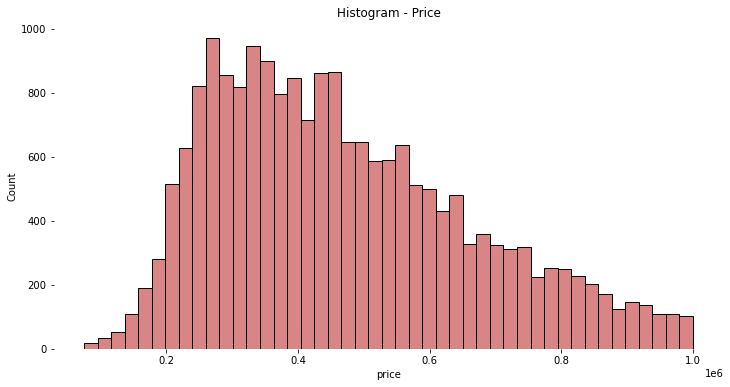

In [15]:
# Atributo de preço
plt.figure(figsize = (12, 6))

sns.histplot(data = dados['price'], color = 'indianred')
sns.despine(bottom = True, left = True)
plt.title('Histogram - Price');

In [16]:
# Estatística descritiva dos valores númericos

dados[num_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sqft_living,"19,951.00","1,956.39",755.67,290.00,"1,390.00","1,840.00","2,410.00","7,480.00"
sqft_lot,"19,951.00","14,548.40","40,138.54",520.00,"5,000.00","7,500.00","10,260.00","1,651,359.00"
sqft_above,"19,951.00","1,693.75",711.79,290.00,"1,170.00","1,510.00","2,085.00","5,710.00"
sqft_basement,"19,951.00",262.64,404.03,0.00,0.00,0.00,500.00,"2,720.00"
sqft_living15,"19,951.00","1,909.27",600.89,399.00,"1,461.50","1,790.00","2,260.00","4,950.00"
sqft_lot15,"19,951.00","12,403.88","26,527.61",651.00,"5,040.00","7,527.00","9,840.00","871,200.00"
price,"19,951.00","468,377.06","195,155.45","75,000.00","315,000.00","435,000.00","594,950.00","999,999.00"


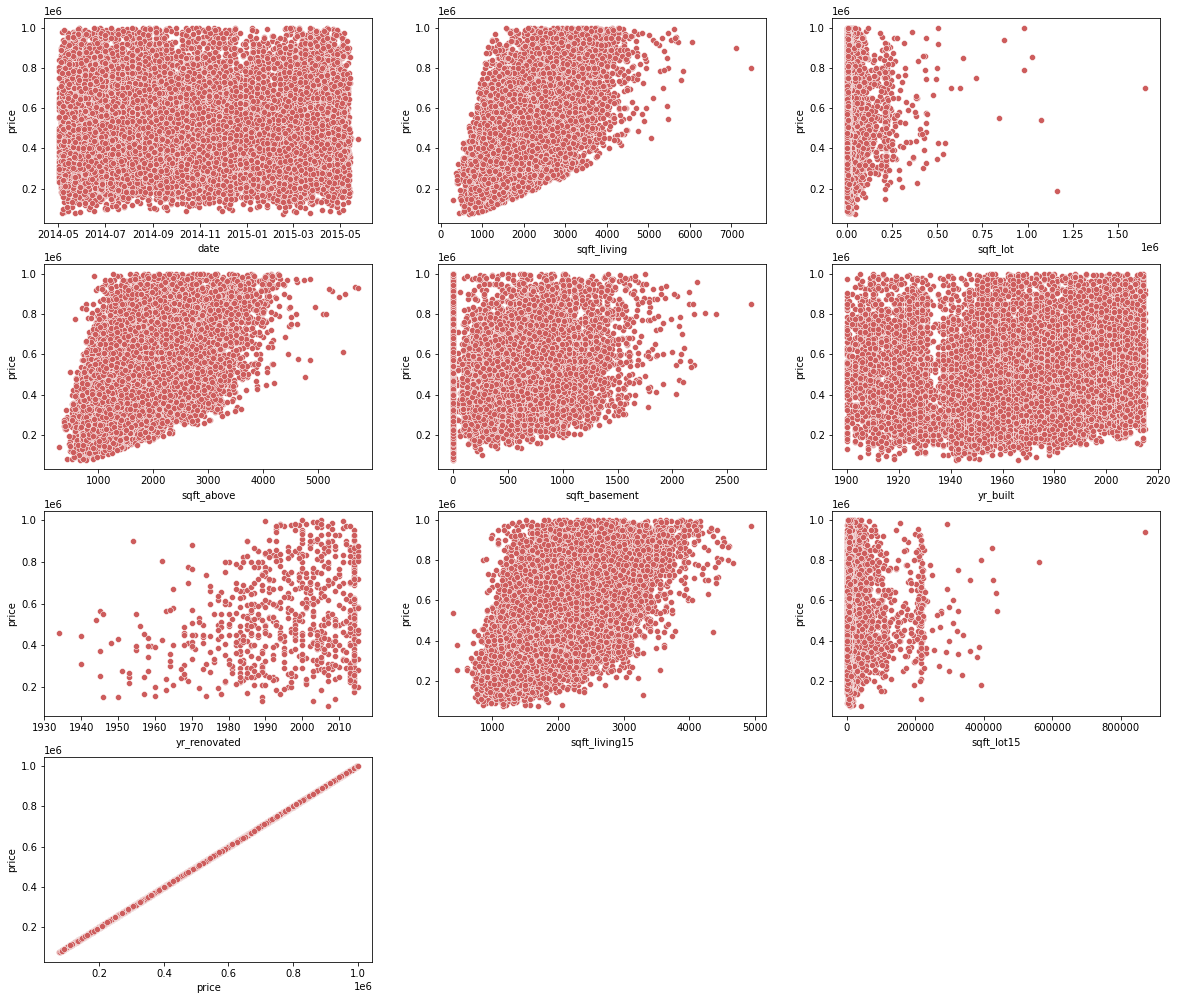

In [17]:
plt.figure(figsize = (20,40 ))

x = 1
for d in dados[num_vars]:
    plt.subplot(9, 3, x)
    sns.scatterplot(data = dados[num_vars], x = d, y = 'price', color = 'indianred')
    x += 1

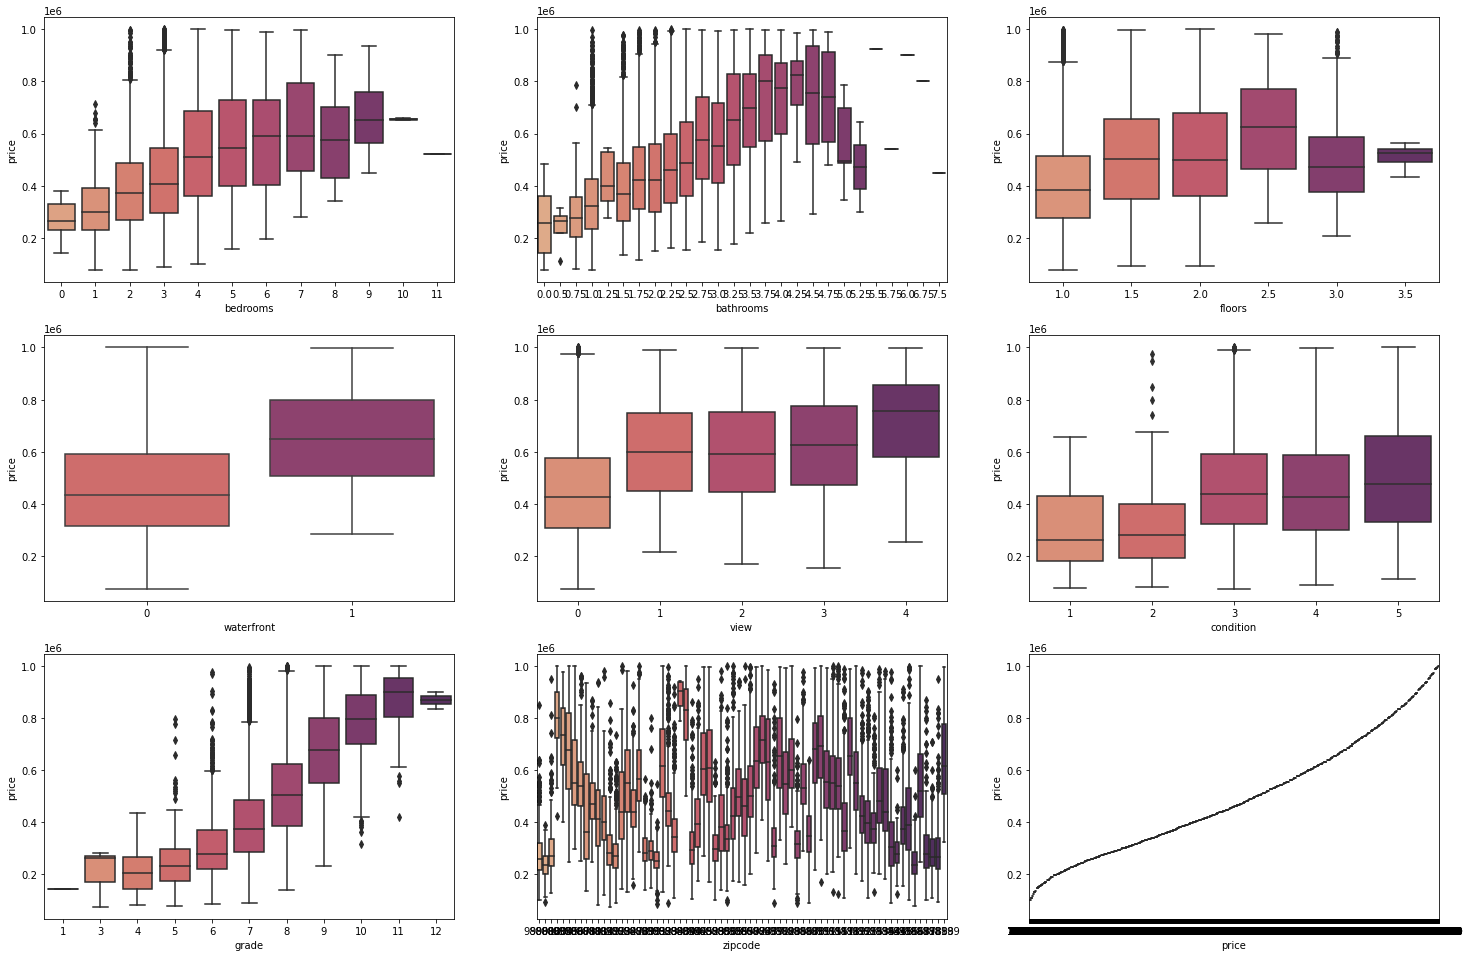

In [18]:
plt.figure(figsize = (25,40 ))

x = 1
for d in dados[cat_vars]:
    plt.subplot(7, 3, x)
    sns.boxplot(data = dados[cat_vars], x = d, y = 'price', palette = 'flare')
    x += 1

In [19]:
dados[num_vars]

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,2014-10-13,1180,5650,1180,0,1955-01-01,NaT,1340,5650,"221,900.00"
1,2014-12-09,2570,7242,2170,400,1951-01-01,1991-01-01,1690,7639,"538,000.00"
2,2015-02-25,770,10000,770,0,1933-01-01,NaT,2720,8062,"180,000.00"
3,2014-12-09,1960,5000,1050,910,1965-01-01,NaT,1360,5000,"604,000.00"
4,2015-02-18,1680,8080,1680,0,1987-01-01,NaT,1800,7503,"510,000.00"
...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,1530,1131,1530,0,2009-01-01,NaT,1530,1509,"360,000.00"
21609,2015-02-23,2310,5813,2310,0,2014-01-01,NaT,1830,7200,"400,000.00"
21610,2014-06-23,1020,1350,1020,0,2009-01-01,NaT,1020,2007,"402,101.00"
21611,2015-01-16,1600,2388,1600,0,2004-01-01,NaT,1410,1287,"400,000.00"


In [20]:
style = {'description_width': 'initial'}

#Botões interativos tamanho mínimo área construida
min_sqft_living = widgets.IntSlider(value= dados['sqft_living'].median(),
                                min= dados['sqft_living'].min(),
                                max= dados['sqft_living'].max(),
                                step= 1,
                                description= 'Minimum Sqft Living',
                                disable= False,
                                style= style)

#Botões interativos número mínimo de banheiros
min_bath = widgets.IntSlider(value= dados['bathrooms'].median(),
                                min= dados['bathrooms'].min(),
                                max= dados['bathrooms'].max(),
                                step= 1,
                                description= 'Minimum Bathrooms',
                                disable= False,
                                style= style)

#Botões interativos preço máximo
price_limit = widgets.IntSlider(value= dados['price'].median(),
                                min= dados['price'].min(),
                                max= dados['price'].max(),
                                step= 1,
                                description= 'Maximum Price',
                                disable= False,
                                style= style)

#Botões interativos grade
min_grade = widgets.IntSlider(value= dados['grade'].median(),
                                min= dados['grade'].min(),
                                max= dados['grade'].max(),
                                step= 1,
                                description= 'Minimum Grade',
                                disable= False,
                                style= style)

#Botões interativos condições do imóvel
condition_bar = widgets.SelectMultiple(options= dados['condition'].sort_values().unique().tolist(),
                                  value= [3],
                                  description= 'Condition',
                                  disable=False)


#Botões interativos waterfront
options = dados['waterfront'].unique().tolist()

waterfront_bar = widgets.Dropdown(options= options,
                                  value= 0,
                                  description= 'Water View',
                                  disable=False)

def update_map(dados, min_sqft_living, min_bath, price_limit, min_grade, condition_bar, waterfront_bar):
    
    df = dados.copy()
    
    houses = df[(df['sqft_living'] >= min_sqft_living) &
                  (df['bathrooms'] >= min_bath) &
                  (df['price'] <= price_limit) &
                  (df['grade'] >= min_grade) &
                  (df['condition'].isin(condition_bar)) &
                  (df['waterfront'] == waterfront_bar)
                 ]
    
    mapa = px.scatter_mapbox(houses, 
                             lat='lat', 
                             lon='long',
                             hover_name= 'id',
                             size= 'sqft_living',
                             color= 'price',
                             color_continuous_scale= px.colors.cyclical.IceFire,
                             size_max= 15,
                             zoom= 10)

    mapa.update_layout(mapbox_style= 'open-street-map')
    mapa.update_layout(height= 600, margin= {'r': 0, 't': 0, 'l': 0, 'b': 0})
    mapa.show()

In [21]:
widgets.interactive(update_map, dados=fixed(dados), 
                    min_sqft_living=min_sqft_living, min_bath=min_bath, 
                    price_limit=price_limit, min_grade=min_grade, 
                    condition_bar=condition_bar, waterfront_bar=waterfront_bar)

interactive(children=(IntSlider(value=1840, description='Minimum Sqft Living', max=7480, min=290, style=Slider…

### 3.1.4 Levantamento de hipóteses

H1: Imóveis com pés quadrados do interior da casa custam mais <br>
H2: Imóveis renovados custam mais  <br>
H3: Quanto mais recente a renovação, mais caro é o imóvel  <br>
H4: Quanto mais antigo um imóvel, mais barato ele é, na média <br>
H5: Quanto mais quartos o imóvel possue, mais caro ele é <br>
H6: Imóveis com mais de 4 quartos custam mais <br>
H7: Imóveis com mais banheiros custam mais <br>
H8: Quanto mais pisos a casa tem, mais caro ela é <br>
H9: Imóveis com vista para a água são mais caros <br>
H10: Imóveis com view acima ou igual a 1 são mais caros <br>
H11: Imóveis com condition acima ou igual a 3 são mais caros <br>
H12: Imóveis com grade acima de 7 são bem mais caros <br>

### 3.1.5 Análise Exploratória de Dados

**H1: Imóveis com pés quadrados do interior da casa custam mais**

In [22]:
dados[['sqft_living', 'price']].corr(method = 'pearson')

,sqft_living,price
sqft_living,1.00,0.60
price,0.60,1.00


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

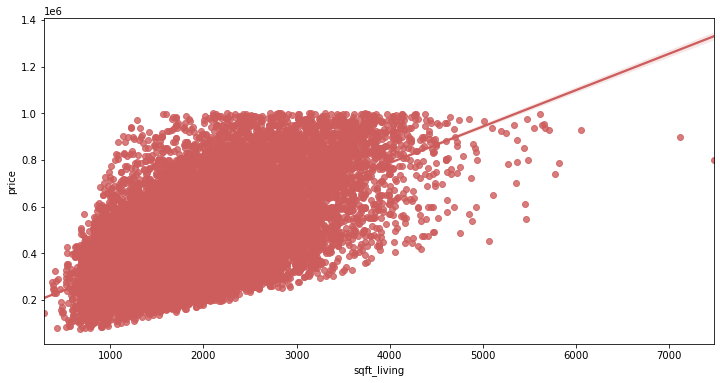

In [23]:
plt.figure(figsize=(12, 6))

sns.regplot(data = dados[['sqft_living', 'price']], x = "sqft_living", y = 'price', color = 'indianred')

**H2: Imóveis renovados em uma mesma região custam mais caro**

In [24]:
dados['yr_renovated_flag'] = dados['yr_renovated'].apply(lambda x: 0 if pd.notnull(x) else 1)

In [25]:
dados['yr_renovated_flag'].value_counts()

1    19223
0      728
Name: yr_renovated_flag, dtype: int64

   yr_renovated_flag      price
0                  0 543,098.49
1                  1 465,547.26


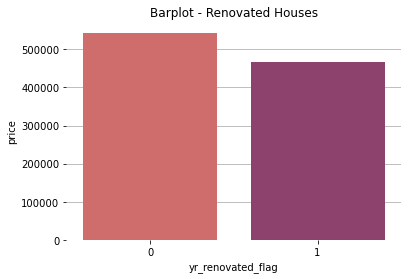

In [26]:
ax = sns.barplot(data = dados[['price', 'yr_renovated_flag']].groupby('yr_renovated_flag', as_index = False).mean(),
           x = 'yr_renovated_flag', y = 'price', palette = 'flare')

plt.title('Barplot - Renovated Houses' )
sns.despine(bottom = True, left = True);

ax.grid(axis='y')
ax.set_axisbelow(True)

print(dados[['price', 'yr_renovated_flag']].groupby('yr_renovated_flag', as_index = False).mean())

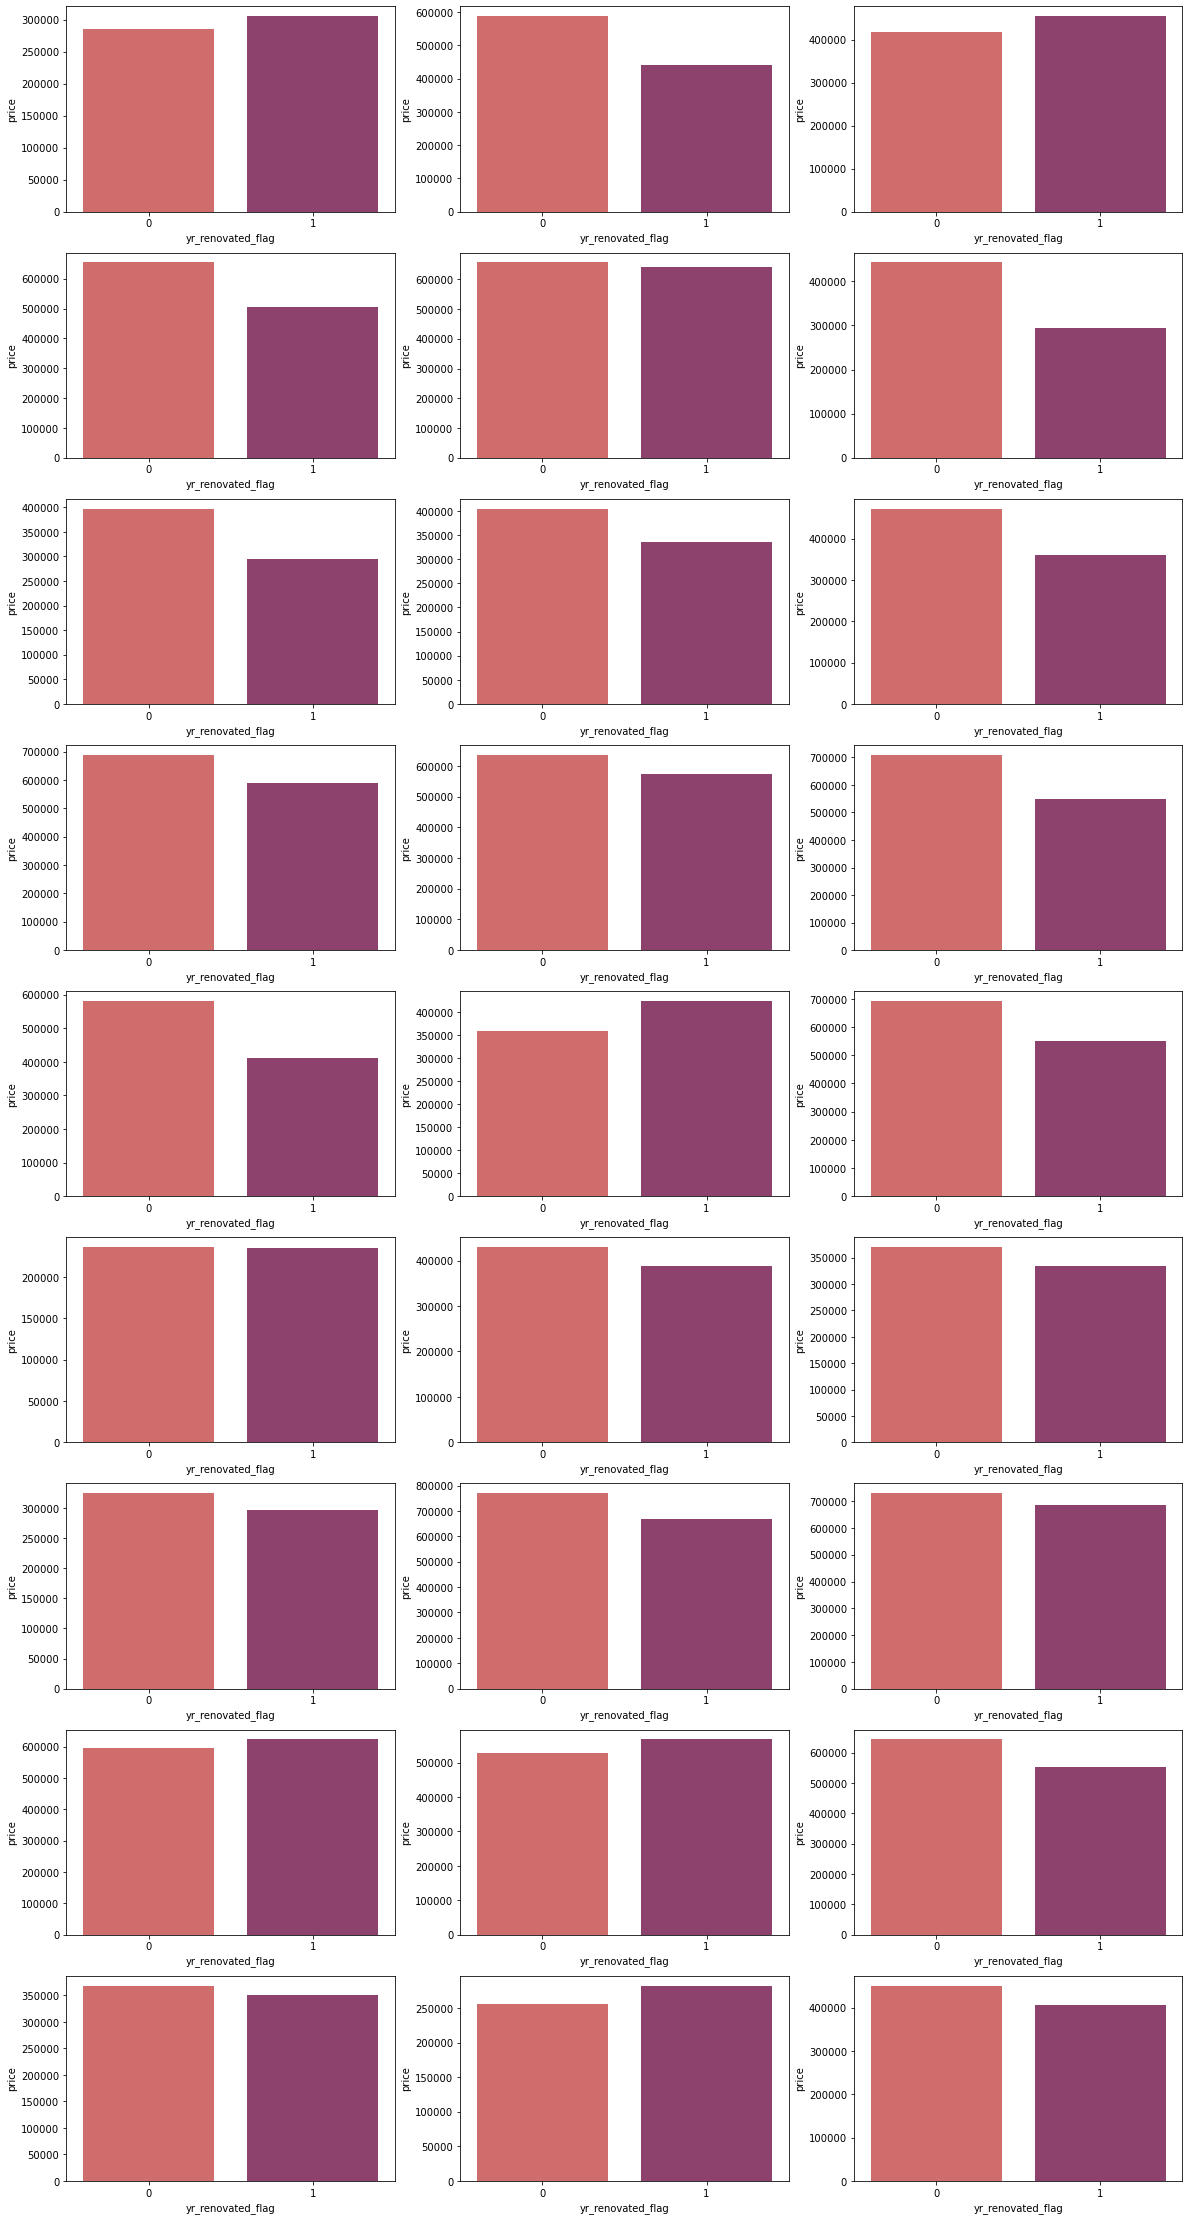

In [27]:
plt.figure(figsize = (20,40 ))

x = 1
for d in dados['zipcode'].unique()[:27]:
    plt.subplot(9, 3, x)
    sns.barplot(data = dados[dados["zipcode"]==d][['price', 'yr_renovated_flag']].groupby('yr_renovated_flag', as_index = False).mean(),
           x = 'yr_renovated_flag', y = 'price', palette = 'flare')
    x += 1

**H3: Quanto mais recente a renovação, mais caro é o imóvel**

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

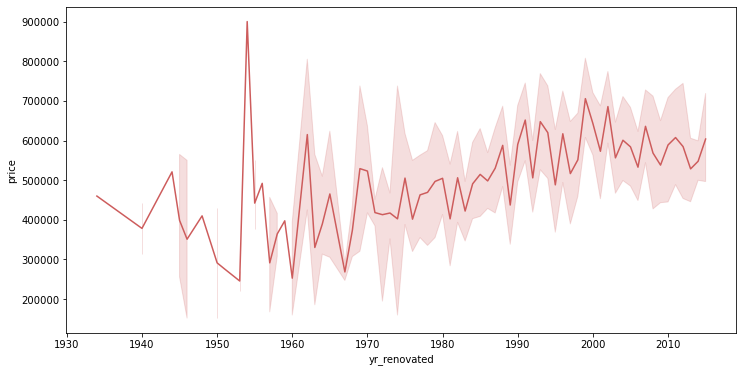

In [28]:
plt.figure(figsize=(12, 6))

sns.lineplot(data = dados[['yr_renovated', 'price']], x = "yr_renovated", y = 'price', color = 'indianred')

**H4: Quanto mais antigo um imóvel e não renovado, mais barato ele é**

<AxesSubplot:xlabel='yr_built', ylabel='price'>

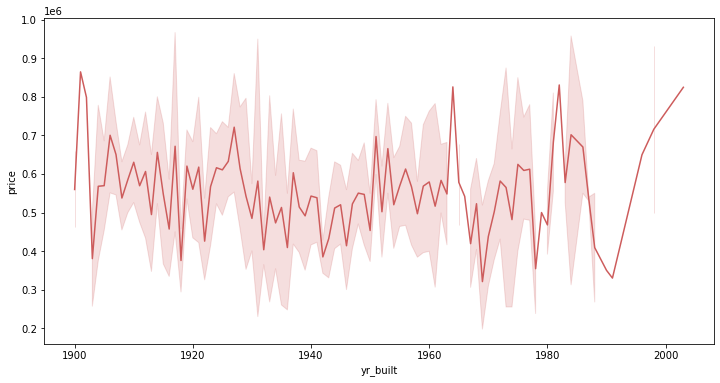

In [29]:
plt.figure(figsize=(12, 6))

sns.lineplot(data = dados[['yr_built', 'price']][dados['yr_renovated_flag'] == 0], x = "yr_built", y = 'price', color = 'indianred')

**H5: Quanto mais quartos o imóvel possue, mais caro ele é**

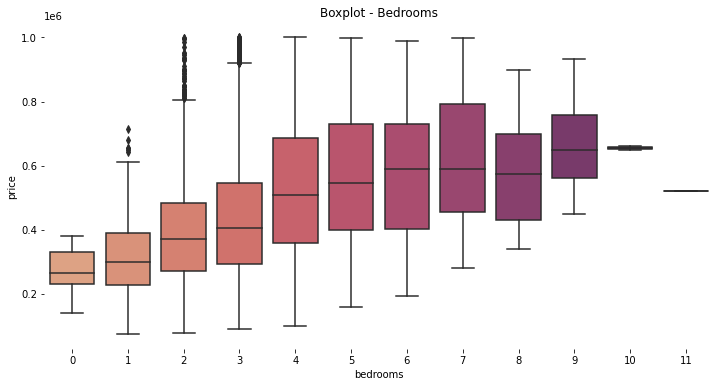

In [30]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['bedrooms', 'price']],
           x = 'bedrooms', y = 'price', palette = 'flare')

plt.title('Boxplot - Bedrooms' )
sns.despine(bottom = True, left = True);

In [31]:
dados[['bedrooms', 'price']].groupby('bedrooms').mean().pct_change()

,price
bedrooms,
0,NaN
1,0.19
2,0.23
3,0.12
4,0.22
5,0.06
6,0.02
7,0.07
8,-0.05


**H6: Imóveis com mais de 4 quartos custam mais**

In [32]:
dados['maior_4_bedrooms_flag'] = dados['bedrooms'].apply(lambda x: 0 if x < 4 else 1)

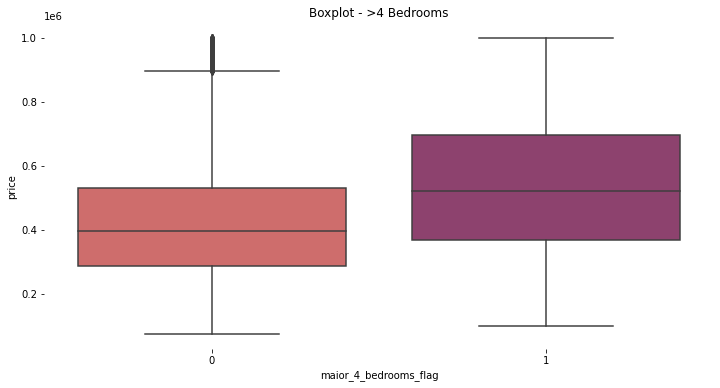

In [33]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['maior_4_bedrooms_flag', 'price']],
           x = 'maior_4_bedrooms_flag', y = 'price', palette = 'flare')

plt.title('Boxplot - >4 Bedrooms' )
sns.despine(bottom = True, left = True);

In [34]:
dados[['maior_4_bedrooms_flag', 'price']].groupby('maior_4_bedrooms_flag').mean().pct_change()

,price
maior_4_bedrooms_flag,
0,NaN
1,0.28


**H7: Imóveis com mais banheiros custam mais**

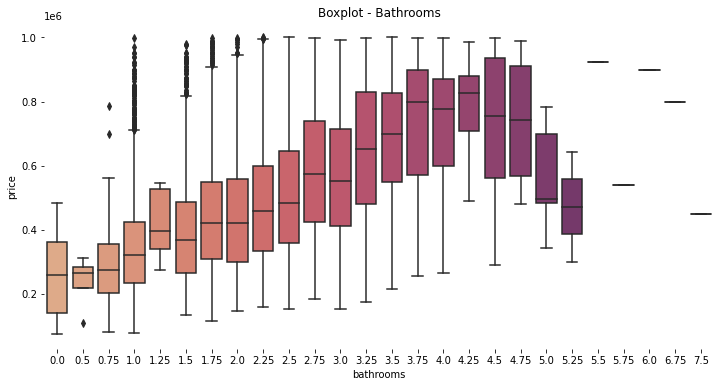

In [35]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['bathrooms', 'price']],
           x = 'bathrooms', y = 'price', palette = 'flare')

plt.title('Boxplot - Bathrooms' )
sns.despine(bottom = True, left = True);

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

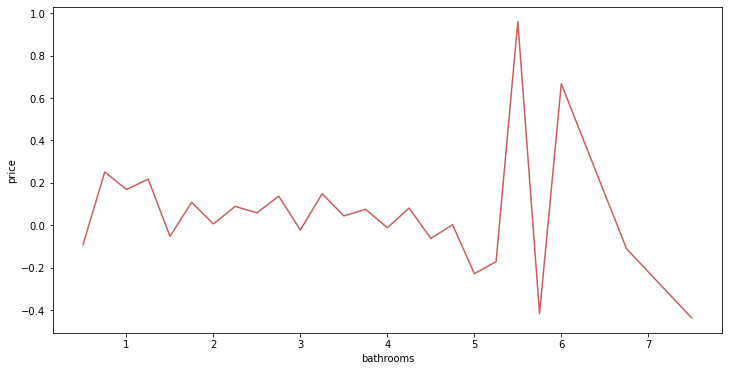

In [36]:
plt.figure(figsize=(12, 6))

sns.lineplot(data = dados[['bathrooms', 'price']].groupby('bathrooms').mean().pct_change(), x = "bathrooms", y ="price", color = 'indianred')

**H8: Quanto mais pisos a casa tem, mais caro ela é**

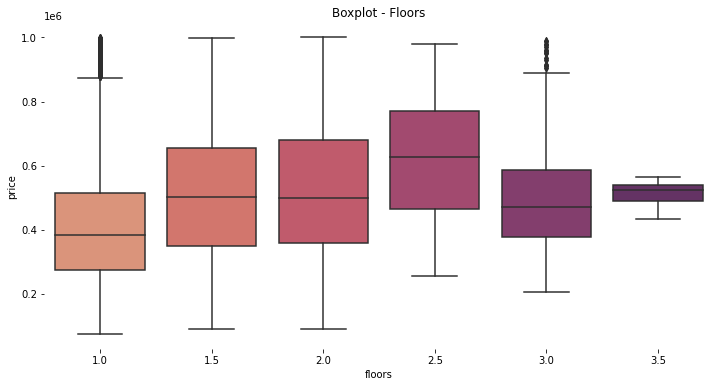

In [37]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['floors', 'price']],
           x = 'floors', y = 'price', palette = 'flare')

plt.title('Boxplot - Floors' )
sns.despine(bottom = True, left = True);

**H9: Imóveis com vista para a água são mais caros**

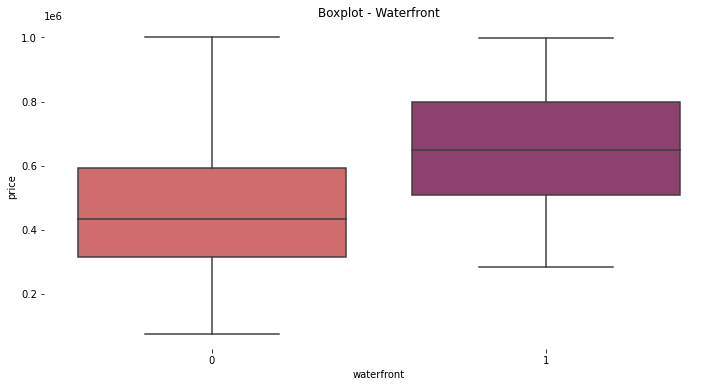

In [38]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['waterfront', 'price']],
           x = 'waterfront', y = 'price', palette = 'flare')

plt.title('Boxplot - Waterfront' )
sns.despine(bottom = True, left = True);

plt.savefig('../images/top1.png')

In [39]:
dados[['waterfront', 'price']].groupby('waterfront').mean().pct_change()

,price
waterfront,
0,NaN
1,0.40


**H11: Imóveis com condition acima ou igual a 3 são mais caros**

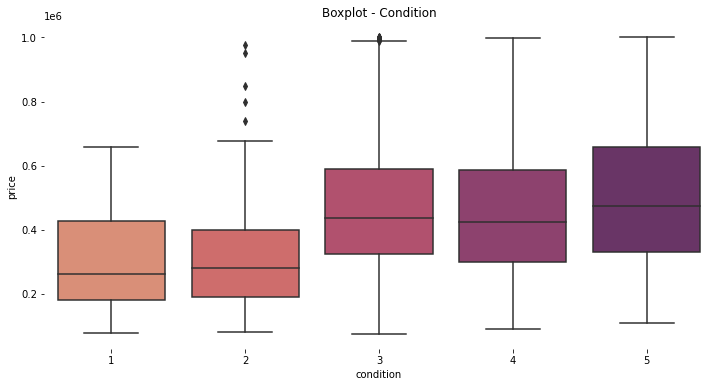

In [40]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['condition', 'price']],
           x = 'condition', y = 'price', palette = 'flare')

plt.title('Boxplot - Condition' )
sns.despine(bottom = True, left = True);

plt.savefig('../images/top2.png')

In [41]:
dados['maior_3_condition_flag'] = dados['condition'].apply(lambda x: 0 if x < 3 else 1)

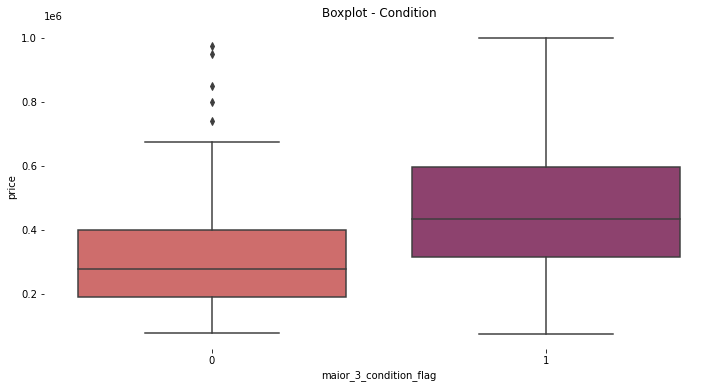

In [42]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['maior_3_condition_flag', 'price']],
           x = 'maior_3_condition_flag', y = 'price', palette = 'flare')

plt.title('Boxplot - Condition' )
sns.despine(bottom = True, left = True);

In [43]:
dados[['maior_3_condition_flag', 'price']].groupby('maior_3_condition_flag').mean().pct_change()

,price
maior_3_condition_flag,
0,NaN
1,0.51


**H12: Imóveis com grade acima de 7 são bem mais caros**

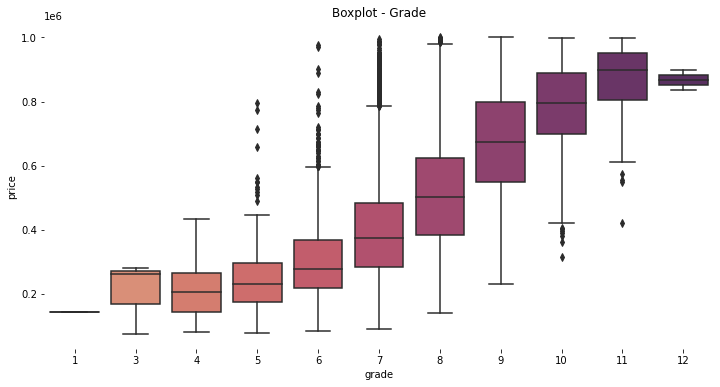

In [44]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['grade', 'price']],
           x = 'grade', y = 'price', palette = 'flare')

plt.title('Boxplot - Grade' )
sns.despine(bottom = True, left = True);

plt.savefig('../images/top3.png')

In [45]:
dados['maior_7_grade_flag'] = dados['grade'].apply(lambda x: 0 if x < 7 else 1)

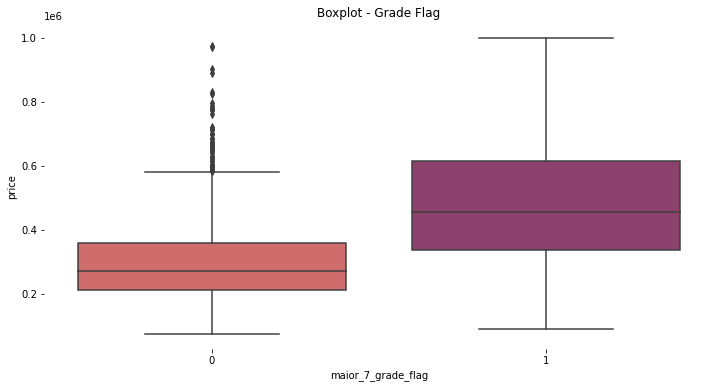

In [46]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = dados[['maior_7_grade_flag', 'price']],
           x = 'maior_7_grade_flag', y = 'price', palette = 'flare')

plt.title('Boxplot - Grade Flag' )
sns.despine(bottom = True, left = True);

In [47]:
dados[['maior_7_grade_flag', 'price']].groupby('maior_7_grade_flag').mean().pct_change()

,price
maior_7_grade_flag,
0,NaN
1,0.66



### 3.1.6 Identificação de Insights

**1. Imóveis com vista para água são 40% mais caros na média.**

**2. Imóveis com condition acima ou igual a 3 são 53% mais caros na média.**

**3. Imóveis com grade acima de 7 são 67% mais caros na média.**


### 3.1.7 Sugestões de soluções para o negócio

1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra? <p>
    * Agrupar os imóveis por região (zipcode)
    * Encontrar a mediana do preço do imóvel por região
    * Sugerir a compra dos imóveis abaixo do preço mediano com condições acima ou igual a 3 ou vista para água ou grade acima de 7

2. Uma vez a casa em posse da empresa, qual seria o preço da venda? <p>
    * Criar 4 faixas de preço, usando a mediana da região como referência
    * Aumentar o valor de venda do imóvel até atingir a próxima faixa
    * Limitar aumento do imóvel em 30% 

In [48]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_flag,maior_4_bedrooms_flag,maior_3_condition_flag,maior_7_grade_flag
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,NaT,98178,47.51,-122.26,1340,5650,1,0,1,1
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,1991-01-01,98125,47.72,-122.32,1690,7639,0,0,1,1
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0,0,...,NaT,98028,47.74,-122.23,2720,8062,1,0,1,0
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,NaT,98136,47.52,-122.39,1360,5000,1,1,1,1
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,NaT,98074,47.62,-122.05,1800,7503,1,0,1,1


In [49]:
# dados[dados['id'].duplicated(keep=False)].sort_values("id") **** lembrar de retirar dados duplicados ****

| ID Imóvel | Região | Condição | Vista para água | Grade | Preço | Preço Mediana | Status Compra | Faixa 0 | Faixa 1 | Faixa 2 | Faixa 3 | Faixa Atual | Faixa Sugerida | Aumento | Preço Venda | Lucro Potencial
| :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- |


In [50]:
df_columns = dados[["id", "zipcode", "condition", "waterfront", "grade", "sqft_living","price"]].copy()

In [51]:
median_zipcode = df_columns.groupby("zipcode")[["price", "sqft_living"]].median().reset_index(drop=False)

In [52]:
df_median = pd.merge(df_columns, median_zipcode, on="zipcode", how="left", suffixes=["", "_median"])

In [53]:
df_median

,id,zipcode,condition,waterfront,grade,sqft_living,price,price_median,sqft_living_median
0,7129300520,98178,3,0,7,1180,"221,900.00","279,000.00",1725
1,6414100192,98125,3,0,7,2570,"538,000.00","425,000.00",1590
2,5631500400,98028,3,0,6,770,"180,000.00","440,000.00",2070
3,2487200875,98136,5,0,7,1960,"604,000.00","479,250.00",1545
4,1954400510,98074,3,0,8,1680,"510,000.00","635,000.00",2470
...,...,...,...,...,...,...,...,...,...
19946,263000018,98103,3,0,8,1530,"360,000.00","547,000.00",1480
19947,6600060120,98146,3,0,8,2310,"400,000.00","305,000.00",1480
19948,1523300141,98144,3,0,7,1020,"402,101.00","438,500.00",1580
19949,291310100,98027,3,0,8,1600,"400,000.00","550,388.00",2310


In [54]:
# definindo função de compra
def status_compra(dados):
    if ((dados["condition"] >=3) & (dados["grade"] >= 7) | (dados["waterfront"] == 1)) \
        & (dados["price"] <= dados["price_median"]) & (dados["sqft_living"] >= dados["sqft_living_median"]):
        return "Comprar"
    else:
        return "Não Comprar"

In [55]:
df_median["status_compra"] = df_median.apply(status_compra, axis=1)

In [56]:
df_median['status_compra'].value_counts()

Não Comprar    18082
Comprar         1869
Name: status_compra, dtype: int64

In [57]:
df_median["faixa_inf"] = df_median["price_median"] * 0.90
df_median["faixa_sup"] = df_median["price_median"] * 1.10

In [58]:
def faixa_atual(dados):
    if dados["price"] < dados["faixa_inf"]:
        return "faixa_0"
    elif (dados["price"] >= dados["faixa_inf"]) & (dados["price"] < dados["price_median"]):
        return "faixa_1"
    elif  (dados["price"] >= dados["price_median"]) & (dados["price"] < dados["faixa_sup"]):
        return "faixa_2"
    else:
        return "faixa_3"

In [59]:
df_median["faixa_atual"] = df_median.apply(faixa_atual, axis=1)

In [60]:
def preco_venda(dados):
    if dados["faixa_atual"] == "faixa_0":
        return (dados["faixa_inf"] - dados["price"]) + dados["price"]
    elif dados["faixa_atual"] == "faixa_1":
        return (dados["price_median"] - dados["price"]) + dados["price"]
    elif dados["faixa_atual"] == "faixa_2":
        return (dados["faixa_sup"] - dados["price"]) + dados["price"]
    else:
        return dados["price"]

In [61]:
def preco_ajuste(dados):
    if dados["preco_venda"] > dados["price"] * 1.3:
        return dados["price"] * 1.3
    elif dados["preco_venda"] < dados["price"] * 1.05:
        return dados["price"] * 1.05 
    else:
        return dados["preco_venda"]

In [62]:
df_median["preco_venda"] = df_median.apply(preco_venda, axis=1)
df_median["preco_venda"] = df_median.apply(preco_ajuste, axis=1)

In [63]:
df_median["oportunidade_lucro"] = df_median["preco_venda"] - df_median["price"]

### Resultado e Relatório

In [64]:
lucro = df_median["oportunidade_lucro"][df_median["status_compra"] == "Comprar"].sum()
print ("A oportunidade de lucro com a sugestão de estratégia é de: **%d MM**" % (lucro/1000000))

A oportunidade de lucro com a sugestão de estratégia é de: **63 MM**


In [86]:
margem = lucro/df_median["preco_venda"][df_median["status_compra"] == "Comprar"].sum()
margem*100

7.6190772503647

In [81]:
qtd_imoveis_compra = df_median["oportunidade_lucro"][df_median["status_compra"] == "Comprar"].shape
qtd_imoveis_compra

(1869,)

In [85]:
pct_compra_portfolio = qtd_imoveis_compra[0]/df_median.shape[0]
pct_compra_portfolio*100

9.367951481128765

In [65]:
df_solucao = df_median[df_median["status_compra"] == "Comprar"].sort_values("oportunidade_lucro", ascending=False)

In [66]:
df_solucao.to_excel("../outputs/imoveis_para_compra_venda.xlsx", index=False)

In [67]:
df_solucao.head()

,id,zipcode,condition,waterfront,grade,sqft_living,price,price_median,sqft_living_median,status_compra,faixa_inf,faixa_sup,faixa_atual,preco_venda,oportunidade_lucro
1639,1832100030,98040,3,0,10,3570,"597,326.00","830,000.00",2310,Comprar,"747,000.00","913,000.00",faixa_0,"747,000.00","149,674.00"
13776,4034900065,98006,4,0,7,2580,"459,900.00","675,000.00",2430,Comprar,"607,500.00","742,500.00",faixa_0,"597,870.00","137,970.00"
995,6072600200,98006,3,0,8,2500,"470,500.00","675,000.00",2430,Comprar,"607,500.00","742,500.00",faixa_0,"607,500.00","137,000.00"
8612,424059100,98005,3,0,8,3020,"449,228.00","733,800.00",2360,Comprar,"660,420.00","807,180.00",faixa_0,"583,996.40","134,768.40"
7948,6072760210,98006,4,0,8,2670,"437,850.00","675,000.00",2430,Comprar,"607,500.00","742,500.00",faixa_0,"569,205.00","131,355.00"
